<a href="https://colab.research.google.com/github/chngdickson/depth_ai/blob/main/SSIM_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch  
import torch.nn as nn
import numpy as np
import math
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [2]:
!git clone https://github.com/chngdickson/depth_ai.git

Cloning into 'depth_ai'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 30 (delta 9), reused 22 (delta 4), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [3]:
def SSIM(x, y, C1=1e-4, C2=9e-4, kernel_size=3, stride=1):
    """
    Structural SIMilarity (SSIM) distance between two images.

    Parameters
    ----------
    x,y : torch.Tensor [B,3,H,W]
        Input images
    C1,C2 : float
        SSIM parameters
    kernel_size,stride : int
        Convolutional parameters

    Returns
    -------
    ssim : torch.Tensor [1]
        SSIM distance
    """
    pool2d = nn.AvgPool2d(kernel_size, stride=stride)
    refl = nn.ReflectionPad2d(1)

    x, y = refl(x), refl(y)
    mu_x = pool2d(x)
    mu_y = pool2d(y)

    mu_x_mu_y = mu_x * mu_y
    mu_x_sq = mu_x.pow(2)
    mu_y_sq = mu_y.pow(2)

    sigma_x = pool2d(x.pow(2)) - mu_x_sq
    sigma_y = pool2d(y.pow(2)) - mu_y_sq
    sigma_xy = pool2d(x * y) - mu_x_mu_y
    v1 = 2 * sigma_xy + C2
    v2 = sigma_x + sigma_y + C2

    # Where is the global ssim
    # I think AvgPool basically calculate the LOCAL SSIM
    # While Global SSIM is computer from the sigma's and the mu's. But we should test it out.
    
    # SSIM Nominator and denominator
    # SSIM_N = (2*mu_xy + C)* (2*sigmaxy+C2)
    # SSIM_D = (mu_x^2 + mu_y^2+C1) * (sigma_x^2 + sigma_y^2 + C2)
    ssim_n = (2 * mu_x_mu_y + C1) * v1
    ssim_d = (mu_x_sq + mu_y_sq + C1) * v2
    ssim = ssim_n / ssim_d

    return ssim

In [4]:
def ssim_to_img(ssim):
    arr = np.asarray(ssim[0])
    arr = arr.transpose((1,2,0))
    return arr

In [5]:
load_images = lambda x: np.asarray(Image.open(x).resize((480, 640)))
tensorify = lambda x: torch.Tensor(x.transpose((2, 0, 1))).unsqueeze(0).float().div(255.0)

def read_img(path:str, shape:tuple=(480,640)):
  img = Image.open(path).resize(shape)
  img = np.asarray(img)
  return tensorify(img)


Img1 right


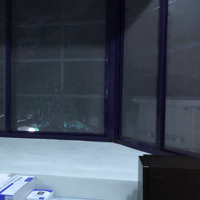

Img1 left


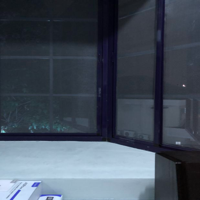

Img2 right


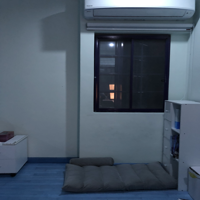

Img2 left


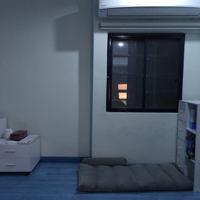

In [6]:
img1_left = Image.open("depth_ai/images/left.jpg").resize((200,200))
img1_right = Image.open("depth_ai/images/right.jpg").resize((200,200))
img2_left = Image.open("depth_ai/images/left2.jpg").resize((200,200))
img2_right = Image.open("depth_ai/images/right2.jpg").resize((200,200))
print("Img1 right")
cv2_imshow(np.asarray(img1_left))
print("Img1 left")
cv2_imshow(np.asarray(img1_right))
print("Img2 right")
cv2_imshow(np.asarray(img2_left))
print("Img2 left")
cv2_imshow(np.asarray(img2_right))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  


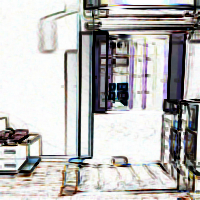

In [7]:
left = read_img("depth_ai/images/left2.jpg",(200,200))
right = read_img("depth_ai/images/right2.jpg",(200,200))

# Comparing Images Side by Side
similarity = SSIM(left,right)
ssim_img = ssim_to_img(similarity)
cv2_imshow(ssim_img*255)

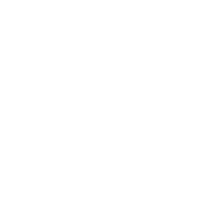

In [8]:
# Comparing SAME IMAGE
similarity = SSIM(right,right)
ssim_img = ssim_to_img(similarity)
cv2_imshow(ssim_img*255)

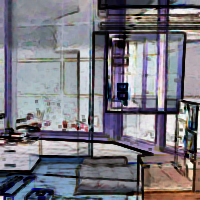

In [9]:
# Comparing Vastly Different Images
img1_left = read_img("depth_ai/images/left.jpg",(200,200))
img2_left = read_img("depth_ai/images/right2.jpg",(200,200))
similarity = SSIM(img1_left,img2_left)
ssim_img = ssim_to_img(similarity)
cv2_imshow(ssim_img*255)

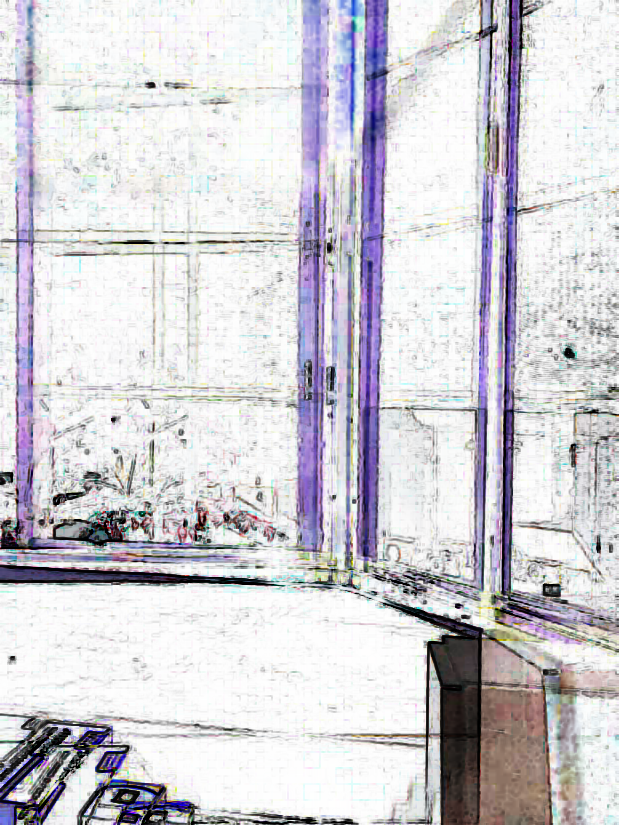

In [19]:
left = read_img("depth_ai/images/left.jpg",(619,825))
right = read_img("depth_ai/images/right.jpg",(619,825))

# Comparing Images Side by Side
similarity = SSIM(left,right)
ssim_img = ssim_to_img(similarity)
cv2_imshow(ssim_img*255)

(825, 619, 3)


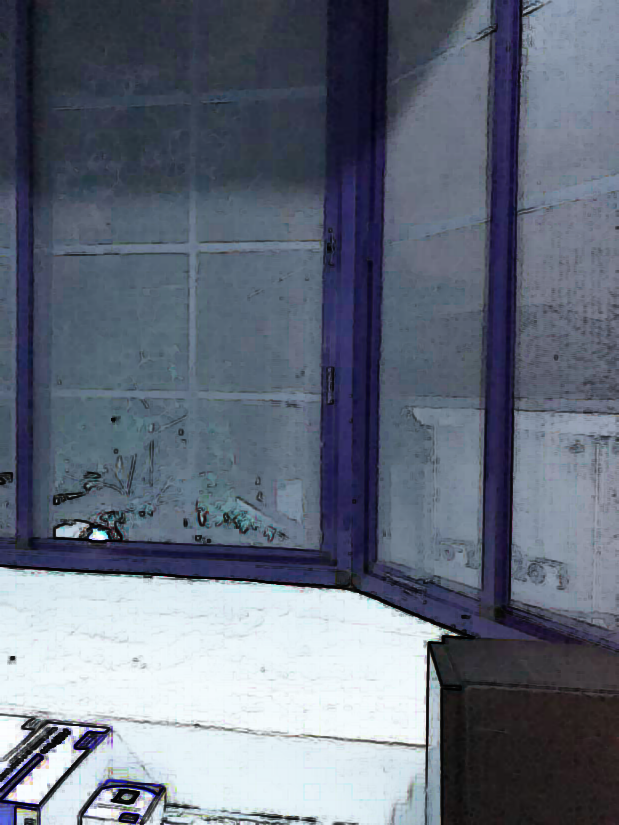

In [20]:
left = read_img("depth_ai/images/left.jpg",(619,825))
white = read_img("depth_ai/images/white_img.png",(619,825))

# Comparing Images Side by Side
similarity = SSIM(left,white)
ssim_img = ssim_to_img(similarity)
print(ssim_img.shape)
cv2_imshow(ssim_img*255)